In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df = pd.read_csv('../data/raw_sales.csv')
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [3]:
def get_outliers(column):
    outliers = []
    
    columns_std = statistics.stdev(column)
    columns_mean = statistics.mean(column)
    
    std_parameter = columns_std * 3 # 3std's
    
    min_limit = columns_mean - std_parameter
    max_limit = columns_mean + std_parameter
    
    for value in column:
        if (value < min_limit) or value > max_limit:
            outliers.append(value)
    
    return outliers

In [6]:
len(get_outliers(df.price))

461

In [7]:
df.shape[0]

29580

In [8]:
# outliers %
len(get_outliers(df.price)) / df.shape[0] * 100

1.5584854631507776

In [9]:
df.price.skew()

np.float64(4.312009366902366)

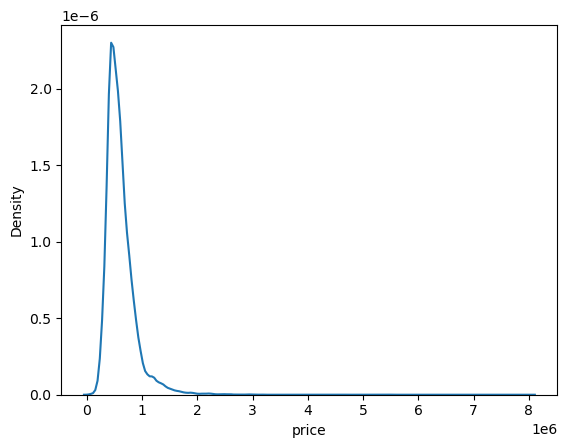

In [10]:
sns.kdeplot(df['price'])
plt.show()

In [12]:
df.describe().round(2)

,postcode,price,bedrooms
count,29580.00,29580.00,29580.00
mean,2730.25,609736.26,3.25
std,146.72,281707.91,0.95
min,2600.00,56500.00,0.00
25%,2607.00,440000.00,3.00
50%,2615.00,550000.00,3.00
75%,2905.00,705000.00,4.00
max,2914.00,8000000.00,5.00


In [13]:
# trying with logarithms

log_price = np.log(df['price'])

In [15]:
log_price.skew()

np.float64(0.4731646269984763)

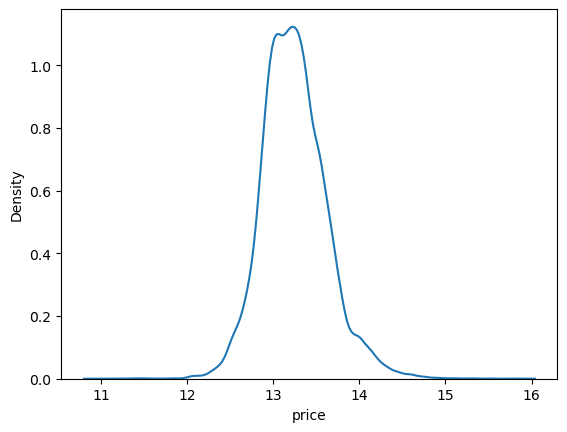

In [16]:
sns.kdeplot(log_price)
plt.show()

In [17]:
log_outliers = get_outliers(log_price)

In [19]:
len(log_outliers) / len(log_price) * 100

0.8992562542258282

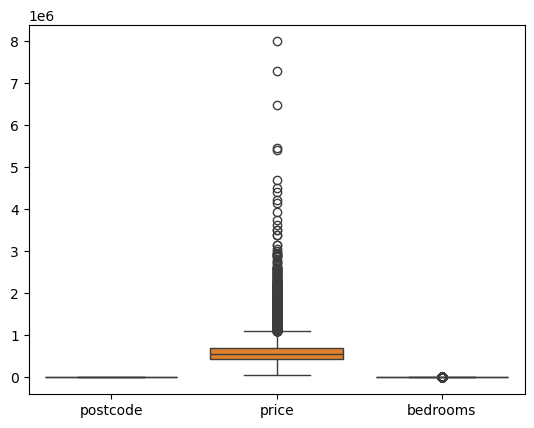

In [21]:
## Using boxplot

sns.boxplot(df)
plt.show()


In [27]:
# using quantiles
# to get the index multiply the number of rows with the quantile percent

# get
np.log(np.log(df['price'])).sort_values().values[12]


np.float64(2.4517148155804023)

In [24]:
25 * 0.50

12.5

In [30]:
df['price'].describe()

count    2.958000e+04
mean     6.097363e+05
std      2.817079e+05
min      5.650000e+04
25%      4.400000e+05
50%      5.500000e+05
75%      7.050000e+05
max      8.000000e+06
Name: price, dtype: float64